# Short tutorial on descriptive statistics using Python and Pandas

This tutorial uses the Wine data set that can be downloaded from Kaggle at the following URL:

https://www.kaggle.com/zynicide/wine-reviews

The tutorial covers the following topics
- Measures of central tendancy (mean, median and mode)
- Measures of spread (range, standard deviation and variance)
- The conection between standard deviation and normal distributions
- Uniform or random distributions
- Outliers
- Data visualisations (Histograms and Boxplots)

In [2]:
# Author: Stephen Sheridan
# Import the required libraries
import pandas as pd
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [3]:
# Set default pylab stuff to show plots inline and set the default plot size
%matplotlib inline
pylab.rcParams['figure.figsize'] = (13.0, 5.0)
warnings.filterwarnings('ignore')

#### Load the data into a dataframe using the read_csv function and display the top rows using the head function.

In [4]:
# Load the wine data from the csv file
wine_df = pd.read_csv('data/winemag-data.csv')
# The following line can be used to drop any rows that have missing values
#wine_df.dropna(inplace=True)
# Display the top 10 rows of the  wine dataframe
wine_df.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


### What would the distribution of random data look like?
When we plot random data on a histogram it should approximate a uniform distribution. In other words, the height of each bin should be roughly the same. 

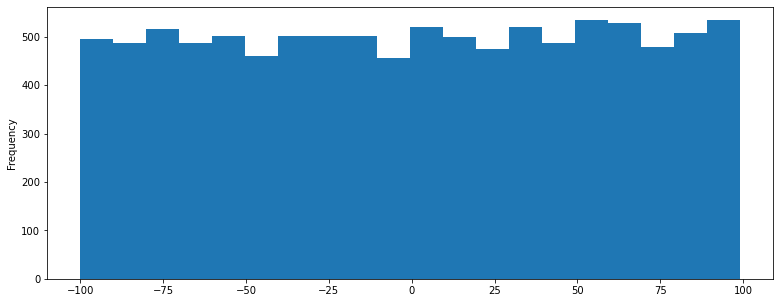

In [5]:
# Lets generate some random data and plot it using a Histogram BINS=50
random_values = np.random.randint(-100, 100, size=(10000))
random_df = pd.DataFrame(random_values, columns=['value'])
random_df['value'].plot(kind='hist', bins=20)
plt.savefig("figs/random_hist.pdf")

### Let's sample the random values?
The code below takes 1000 samples of size 30 and stores the mean of each sample in a list. 

In [6]:
sample_size = 30
number_of_samples = 1000
random_means = []
for i in range(number_of_samples):
    random_sample = random_df.sample(n=sample_size)
    random_means.append(random_sample['value'].mean())

### Plotting the means of the random sample?
When we plot the means of the random data we can see that they approximate a normal distribution. Even though we know the data was random. 

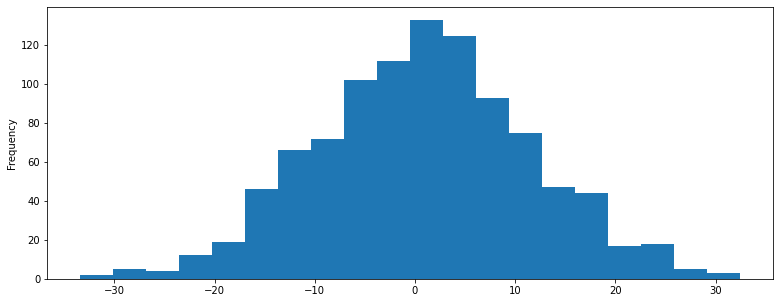

In [7]:
random_means_df = pd.DataFrame(random_means, columns=['value'])
random_means_df['value'].plot(kind='hist', bins=20)


### Is this data normally distributed?

In [28]:
alpha = 0.005
k2, p = stats.normaltest(random_means_df['value'])
if p < alpha:  # null hypothesis: sample comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


### Visualising the wine price data
The following code plots the wine price data on a histogram. Clearly, the wine price data is not normally distributed.

Text(0.5, 0, 'Price')

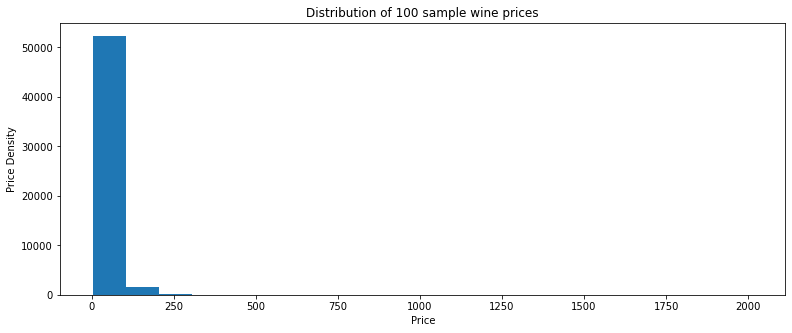

In [11]:
# Let's plot the price data
ax = wine_df['price'].plot(kind='hist', bins=20)
ax.set_title("Distribution of " + str(sample_size) + " sample wine prices")
ax.set_ylabel('Price Density')
ax.set_xlabel('Price')

### Let's take some more random samples of the wine price data
The code below takes 10,000 samples of size 100 from the sample of 10,000.

In [12]:
sample_size = 100
number_of_samples = 10000
sample_means = []
for i in range(number_of_samples):
    wine_sample = wine_df.sample(n=sample_size)
    sample_means.append(wine_sample['price'].mean())

### What does the distribution of the means look like?

value    39.204183
dtype: float64


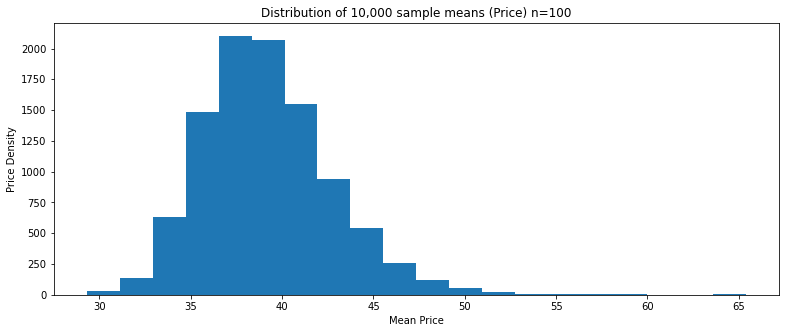

In [18]:
sampled_prices = pd.DataFrame(sample_means, columns=['value'])
ax = sampled_prices['value'].plot(kind='hist', bins=20)
ax.set_title("Distribution of 10,000 sample means (Price) n=" + str(sample_size))
ax.set_ylabel('Price Density')
ax.set_xlabel('Mean Price')
plt.savefig("figs/sample_means_price.pdf")
print(sampled_prices.mean())

### Is this data normally distributed?

In [27]:
alpha = 0.05
k2, p = stats.normaltest(sampled_prices['value'])
if p < alpha:  # null hypothesis: sample comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


### Comparing distributions using a t-test
The code below uses a t-test to check to see if a sample of wine points has a mean that is similar to the population mean (population mean is the mean of the entire data set)

In [30]:
#Grab a sample of the wine data set n=30
sample_size = 30
wine_sample_df = wine_df.sample(n=sample_size)

# Hypothesis
print("Sample of 30 random wine points has mean in line with population mean")

# Population mean 
pop_mean =  wine_df['points'].mean()
# Random sample mean n=30
sample_mean = wine_sample_df['points'].mean()

print("Population mean points " + str(pop_mean) + " Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is similar to the mean of the population
results =  stats.ttest_1samp(wine_sample_df['points'], pop_mean)

print("Stat score = %.6f P-value = %.6f" % (results.statistic, results.pvalue))
print("Accept NULL hypothesis if p-value > 0.05")
print("Otherwise reject NULL hypothesis and accept alternative")

if results.pvalue < alpha:  # null hypothesis: mean of the sample is similar to the mean of the population
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Sample of 30 random wine points has mean in line with population mean
Population mean points 88.96654975078457 Sample mean points 88.93333333333334
Stat score = -0.068284 P-value = 0.946028
Accept NULL hypothesis if p-value > 0.05
Otherwise reject NULL hypothesis and accept alternative
The null hypothesis cannot be rejected


### Comparing distributions using a t-test
We can also use a t-test to check to see if the mean of the wine points sample is in line with some aritrary mean, let's say 50.

In [32]:
#Grab a sample of the wine data set n=30
sample_size = 30
wine_sample_df = wine_df.sample(n=sample_size)

# Hypothesis
print("Sample of 30 random points has mean of 50")

# Random sample mean n=30
sample_mean = wine_sample_df['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is 50
results =  stats.ttest_1samp(wine_sample_df['points'], 50)

print("Stat score = %.6f P-value = %.6f" % (results.statistic, results.pvalue))
print("Accept NULL hypothesis if p-value > 0.05")
print("Otherwise reject NULL hypothesis and accept alternative")

if results.pvalue < alpha:  # null hypothesis: Sample of 30 random points has mean of 50
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Sample of 30 random points has mean of 50
Sample mean points 89.43333333333334
Stat score = 68.140165 P-value = 0.000000
Accept NULL hypothesis if p-value > 0.05
Otherwise reject NULL hypothesis and accept alternative
The null hypothesis can be rejected
